In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

* Pandas has two important data strucures **Series** and **DataFrame**

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

```python
>>> s = pd.Series(data, index=index)
```

<img src="fig_pd_series.png" alt="Pandas Series Example" height="250" width="250" align = "left">

In [ ]:
person_height_ft = pd.Series([5.5,5.2,5.8,6.1,4.8],name='height',
                index = ['person_a','person_b','person_c','person_d','person_e'],dtype=np.float64)
person_height_ft

In [ ]:
person_height_ft.values

In [ ]:
person_height_ft.index

* A Series is like a fixed-size dict in that you can get and set values by index label

In [ ]:
person_height_ft['person_c']

* You can also use the index position to get and set the values

In [ ]:
person_height_ft[3]

In [ ]:
person_height_ft[0:3]

####  Vectorized operations and label alignment with Series

In [ ]:
person_height_mtr = (12* 2.54) * person_height_ft/100
person_height_mtr

In [ ]:
# please note the index which is not same as height
person_weight_kg = pd.Series([70,55,73,68,66],name='weight',
                index = ['person_b','person_d','person_e','person_c','person_a'],dtype=np.float64)
person_weight_kg

In [ ]:
#Let's calculate BMI
bmi = person_weight_kg/person_height_mtr**2
bmi

In [ ]:
#BMI of person_c
68/(1.76784*1.76784)

### DataFrame

* DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

<img src="fig_pd_data_frame.png" alt="Pandas DataFrame Example" height="400" width="400" align = "left">

In [ ]:
index = ['person_a','person_b','person_c','person_d','person_e']
df_person = pd.DataFrame({'height':[5.5,5.2,5.8,6.1,4.8],'weight':[66,70,68,55,73],
                   'gender':['male','male','female','male','female']}, index=index)

In [ ]:
df_person.describe(include='all')

In [ ]:
print(df_person.ndim)
print(df_person.shape)
print(df_person.dtypes)
print(df_person.columns)
print(df_person.index)
print(len(df_person))

In [ ]:
df_person.info()

In [ ]:
df_person.reset_index()

In [ ]:
df_person.reset_index().set_index('gender')

In [ ]:
another_index = ['a','b','c','d','e']
df1 = df_person.reset_index()
df1.index = another_index
df1

### Accessing Data

In [ ]:
# Accessing the column data
height = df_person['height']
height

In [ ]:
type(height)

In [ ]:
# Accessing multiple columns
df_person[['height','weight']]

In [ ]:
# Accessinng one individual cell
df_person['height']['person_a']

In [ ]:
# Accessing rows by index keys
df_person.loc['person_a']

In [ ]:
# Accessing multiple rows using range
df_person['person_a':'person_c']

In [ ]:
# Accessing using index position
print(df_person.iloc[0])
print("--------------")
print(df_person.iloc[0,2])

In [ ]:
# Boolean indexinng
# all persons with height > 5.2 feet
df_person[df_person.height > 5.2]

In [ ]:
# Boolean indexinng
# all persons with height > 5.2 feet and weight > 60kgs
df_person[(df_person.height > 5.2) & (df_person.weight > 60)]

In [ ]:
df_person

In [ ]:
# Let's add new column "age" to the DataFrame
df_person['age'] = pd.Series([30,28,26,19,42], index=index)

In [ ]:
df_person

In [ ]:
# Find all perons with age > 28

In [ ]:
# Find females with age > 28

In [ ]:
# Find max aged person
df_person[df_person.age==df_person.age.max()]

In [ ]:
# Find max aged male person

In [ ]:
# Find all persons having height > average height of the group

### Handling missing values

In [ ]:
df_backup = df_person.copy()

In [ ]:
df_person = df_backup.copy()

In [ ]:
# Let's introduce few NaN values 
df_person.loc['person_a','age'] = np.NaN
df_person.iloc[2,2] = np.NaN
df_person.loc['person_e','height'] = np.NaN
df_person.loc['person_f'] = np.NaN
df_person['married'] = np.NaN

In [ ]:
df_person

In [ ]:
# how takes 'all' or 'any'
# dropping all of the rows if all of the values are np.NaN
df_person.dropna(how='all')

In [ ]:
# how takes 'all' or 'any'
# dropping all of the columns if all of the values are np.NaN
df_person.dropna(axis=1,how='all')

In [ ]:
# Filling all of the NaN values with zero
df_person.fillna(0)

In [ ]:
# replace NaN weight with average weight of the group
#df_person.weight.mean()
df_person['weight'].fillna(df_person.weight.mean())

In [ ]:
df_person.fillna(method='ffill')

In [ ]:
df_person.fillna(method='bfill')

In [ ]:
df_person[df_person['weight'].notnull()]

In [ ]:
df_person[df_person.notnull()['age']]

In [ ]:
df_person = df_person.dropna(how='all')
df_person = df_person.dropna(how='all',axis=1)
df_person

In [ ]:
df_person = df_person.fillna(method='ffill')
df_person

In [ ]:
df_person['bmi'] = df_person['weight']/(((12* 2.54) * df_person['height']/100)**2)
df_person

### GroupBy function

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

<img src="fig_pd_groupby.jpg" alt="Pandas GroupBy" height="350" width="350" align="left">

In [ ]:
df_person

In [ ]:
df_person_grp = df_person.groupby('gender')
print(type(df_person_grp))

In [ ]:
for group,data in df_person_grp:
    print(group, data)
    print("--------------------------------")

In [ ]:
df_person_grp.mean()

In [ ]:
df_person_grp.mean().plot(kind='bar')

### Working with Text Data

In [ ]:
df_person.apply(lambda x: x['gender'].upper()[0], axis=1)

In [ ]:
df_person.columns

In [ ]:
df_person[['weight','height']].apply(lambda x: x.dtype)

In [ ]:
df_person.mean()

In [ ]:
df_person['gender'].str.upper().str[0]

### Working with Dates and TimeSeries Data

In [ ]:
# settig seed ?
np.random.seed(5)
price = pd.Series(np.random.randint(100,high=150,size=150),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'),name='col1')

In [ ]:
price.head()

In [ ]:
price.groupby(pd.TimeGrouper('1M')).max().plot(ylim=(146,150))

In [ ]:
np.random.seed(5)
price1 = pd.Series(np.random.randint(200,high=250,size=500),
                   index=pd.date_range('2000-1-1', periods=500, freq='D'),name='col2')
#all_days = pd.date_range('2000-1-1', periods=500, freq='D')

In [ ]:
df_time = pd.DataFrame({'col1':price,'col2':price1})

In [ ]:
df_time.head()

In [ ]:
len(df_time)

In [ ]:
df_time.dtypes

In [ ]:
df_time.plot(figsize=(16,8))

In [ ]:
df_time.groupby(pd.TimeGrouper('1M')).mean().plot()

In [ ]:
pd.Categorical?

In [ ]:
pd.CategoricalIndex?

In [ ]:
df

In [ ]:
x = pd.Categorical(df_time['label'],ordered=True)

In [ ]:
cat = pd.Series(df['label'], dtype=x)

In [ ]:
cat

In [ ]:
pd.merge?

In [ ]:
pd.concat?

In [3]:
pd.Timestamp?

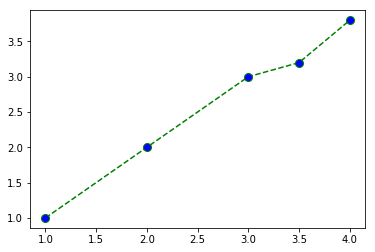

In [5]:
plt.plot([1,2,3,3.5,4.0],[1,2,3,3.2,3.8], 
         color='green', linestyle='dashed', 
         marker='o',markerfacecolor='blue', 
         markersize=8)